In [1]:
!python --version

Python 3.11.13


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import sys
sys.path.append('/content/drive/MyDrive/cough_sound_identification')

In [4]:
# 導入函式庫
from preprocess_for_cnn import *
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import time
from sklearn.metrics import recall_score


In [5]:
save_data_to_array()


Saving vectors of label - '3': 100%|██████████| 244/244 [00:03<00:00, 63.60it/s]


In [6]:
# 載入 data 資料夾的訓練資料，並自動分為『訓練組』及『測試組』
X_train, X_test, y_train, y_test = get_train_test()
#X_train = X_train.reshape(X_train.shape[0], 20, 11, 1)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], X_test.shape[2], 1)

# 類別變數轉為one-hot encoding
y_train_hot = to_categorical(y_train)
y_test_hot = to_categorical(y_test)
print("X_train.shape=", X_train.shape)
print("X_test.shape=", X_test.shape)

# input_shape = X_train.shape

X_train.shape= (663, 60, 11, 1)
X_test.shape= (166, 60, 11, 1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 60, 11, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 60, 11, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 60, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 60, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 30, 5, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 5, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 30, 5, 128)     │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 30, 5, 128)     │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 15, 2, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 15, 2, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 2, 256)     │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 15, 2, 256)     │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 7, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 7, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1792)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       229,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 627,780 (2.39 MB)

 Trainable params: 626,820 (2.39 MB)

 Non-trainable params: 960 (3.75 KB)

Epoch 1/125
12/12 - 18s - 2s/step - accuracy: 0.3303 - loss: 3.8892
Epoch 2/125
12/12 - 0s - 13ms/step - accuracy: 0.3786 - loss: 3.2283
Epoch 3/125
12/12 - 0s - 12ms/step - accuracy: 0.3725 - loss: 2.9520
Epoch 4/125
12/12 - 0s - 11ms/step - accuracy: 0.4284 - loss: 2.5347
Epoch 5/125
12/12 - 0s - 10ms/step - accuracy: 0.4223 - loss: 2.5035
Epoch 6/125
12/12 - 0s - 13ms/step - accuracy: 0.4223 - loss: 2.4647
Epoch 7/125
12/12 - 0s - 12ms/step - accuracy: 0.4072 - loss: 2.3952
Epoch 8/125
12/12 - 0s - 11ms/step - accuracy: 0.3922 - loss: 2.2999
Epoch 9/125
12/12 - 0s - 12ms/step - accuracy: 0.4419 - loss: 2.0606
Epoch 10/125
12/12 - 0s - 10ms/step - accuracy: 0.4148 - loss: 2.1159
Epoch 11/125
12/12 - 0s - 11ms/step - accuracy: 0.4600 - loss: 1.9970
Epoch 12/125
12/12 - 0s - 11ms/step - accuracy: 0.4721 - loss: 1.8986
Epoch 13/125
12/12 - 0s - 9ms/step - accuracy: 0.4570 - loss: 1.9819
Epoch 14/125
12/12 - 0s - 10ms/step - accuracy: 0.4615 - loss: 1.6185
Epoch 15/125
12/12 - 0s - 11ms/

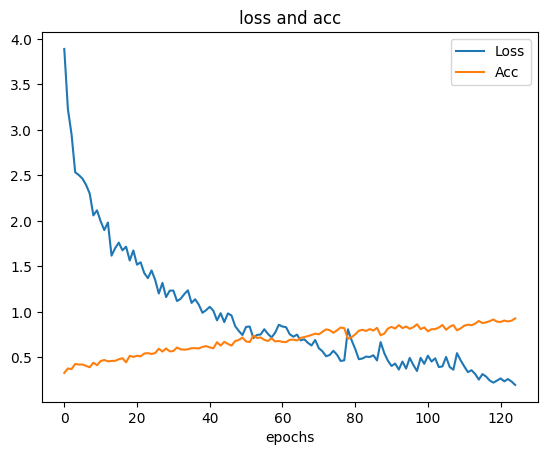

訓練時間為: 35.88 秒


In [7]:
model = Sequential()

# 第一層卷積層，filter=32, kernal size: 3x3, padding: same, activation: selu
model.add(Conv2D(32, kernel_size=(3, 3), padding="same", activation='selu', input_shape= (60,11,1)))
model.add(BatchNormalization())

# 第二層卷積層，filter=32, kernal size: 3x3, padding: same, activation: selu
model.add(Conv2D(64, kernel_size=(3, 3), padding="same", activation='selu'))
model.add(BatchNormalization())
# 第二層池化層，池化大小=2x2，取最大值
model.add(MaxPooling2D(pool_size=(2, 2)))
# 第二層 Dropout層隨機斷開輸入神經元，用於防止過度擬合，斷開比例:0.25
model.add(Dropout(0.25))

# 第三層卷積層，filter=64, kernal size: 3x3, padding: same, activation: selu
model.add(Conv2D(128, kernel_size=(3, 3), padding="same", activation='selu'))
model.add(BatchNormalization())
# 第三層池化層，池化大小=2x2，取最大值
model.add(MaxPooling2D(pool_size=(2, 2)))
# 第三層 Dropout層隨機斷開輸入神經元，用於防止過度擬合，斷開比例:0.35
model.add(Dropout(0.25))

# 第四層卷積層，filter=128, kernal size: 3x3, padding: same, activation: selu
model.add(Conv2D(256, kernel_size=(3, 3), padding="same", activation='selu'))
model.add(BatchNormalization())
# 第四層池化層，池化大小=2x2，取最大值
model.add(MaxPooling2D(pool_size=(2, 2)))
# 第四層 Dropout層隨機斷開輸入神經元，用於防止過度擬合，斷開比例:0.45
model.add(Dropout(0.25))

# 將多維的輸入一維化
model.add(Flatten())

# 第一層全連接層，128個output, activation: selu
model.add(Dense(128, activation='selu'))

#Dropout層隨機斷開輸入神經元，用於防止過度擬合，斷開比例:0.5
model.add(Dropout(0.5))

#全連接層，64個output, activation: selu
model.add(Dense(64, activation='selu'))

#Dropout層隨機斷開輸入神經元，用於防止過度擬合，斷開比例:0.5
model.add(Dropout(0.5))

#全連接層，5個output, activation: softmax
model.add(Dense(4, activation='softmax'))
# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(loss='categorical_crossentropy'
                  ,optimizer='adam',metrics=["accuracy"])
model.summary()
start = time.time()
# 進行訓練, 訓練過程會存在 train_history 變數中
train=model.fit(X_train, y_train_hot, batch_size=60, epochs=125, verbose=2) #,

end = time.time()
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], X_test.shape[2], 1)
#score = model.evaluate(X_test, y_test_hot, verbose=1)


'''儲存訓練過程中 的 loss and acc'''
loss = train.history['loss']
acc = train.history['accuracy']

'''圖形印出loss and acc '''
plt.title('loss and acc')
plt.plot(loss)
plt.plot(acc)
plt.legend(['Loss', 'Acc'])
plt.xlabel('epochs')
plt.show()

print("訓練時間為: {:.2f} 秒".format(end-start))
# 模型存檔
model.save("ASR.keras")  # creates a HDF5 file 'model.h5'





1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━

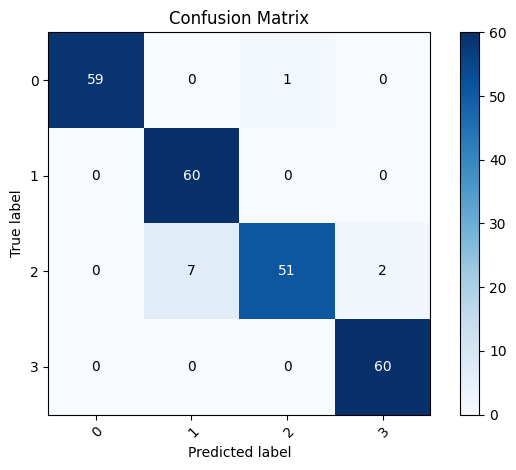

類別 0 的召回率(recall)為: 0.9833333333333333
類別 1 的召回率(recall)為: 1.0
類別 2 的召回率(recall)為: 0.85
類別 3 的召回率(recall)為: 1.0
Unweighted Average Recall(UAR): 0.9583333333333334
辨識正確率為: 95.83333333333334% (230/240)


In [9]:
from keras.models import load_model
import numpy as np
import librosa
import os
from plot_confusion_matrix import plot_confusion_matrix
from keras.preprocessing import sequence
from sklearn.metrics import confusion_matrix, recall_score
import matplotlib.pyplot as plt
#from preprocess import *


path = '/content/drive/MyDrive/cough_sound_identification/cnntest/'

def predict(model):
    pred = []
    true = []
    ii = []
    jj = []
    labels = os.listdir(path)
    for i in labels:
        for j in os.listdir(path + i):
            ii.append(i)
            jj.append(j)
            true.append(int(i[i.find('(')+1]))

            mfcc = wav2mfcc(path + i + '/' + j)

            delta_mfccs = librosa.feature.delta(mfcc)
            delta2_mfccs = librosa.feature.delta(mfcc, order=2)

            # Concatenate MFCCs, delta MFCCs and delta2 MFCCs
            all_mfccs = np.concatenate([mfcc, delta_mfccs, delta2_mfccs], axis=0)

            mfcc_reshaped = all_mfccs.reshape(1, 60, 11, 1)
            tmp = model.predict(mfcc_reshaped)
            pred.append(np.argmax(tmp))
    #print(ii)
    #print()
    #print(jj)
    #print(true)
    #print()
    #print(pred)
    plot_confusion_matrix(true, pred, classes = labels,
                          title='Confusion Matrix')
    right = sum([1 for i, j in zip(true, pred) if i == j])
    acc_rate = right / len(true) * 100
    plt.savefig("Acc_"+str(acc_rate)+"_.png")
    plt.show()

    # 計算每個類別的召回率
    recall_scores = recall_score(true, pred, labels=[0,1,2,3], average=None)
    for i, recall in enumerate(recall_scores):
        print(f"類別 {i} 的召回率(recall)為: {recall}")

    # 計算UAR
    uar = np.mean(recall_scores)
    print(f"Unweighted Average Recall(UAR): {uar}")

    print('辨識正確率為: {acc}% ({t}/{p})'.format(acc=acc_rate, t=right, p=len(true)))


'''=======================以上完全不用改動==================='''

if __name__ == '__main__':
    '''
    如果要使用完整訓練的模型，請把下面兩行註解拿掉
       不用的時候請註解回去 使用自己訓練的模型
    '''
    model = load_model("ASR.keras")
    l = ["zero(0)","one(1)","two(2)","three(3)"]
    filepath = []
    for i in range(len(l)):
        path_ = path+l[i]+"/1_"+str(i)+".wav"
        filepath.append(path_)

    for i in filepath:
        #print(i)
        pass
        #print(predict(i, model=model))



    predict(model)
